In [5]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
# prepare datasets 
bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target

n_samples,n_features=X.shape
print(X.shape)

(569, 30)


In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

x_train=torch.from_numpy(x_train_scaled.astype(np.float32))
x_test=torch.from_numpy(x_test_scaled.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32)).view(-1,1)
y_test=torch.from_numpy(y_test.astype(np.float32)).view(-1,1)





In [8]:
class LogisticModel(nn.Module):
    def __init__(self,num_input_features):
        super().__init__()
        self.linear=nn.Linear(num_input_features,1)

    def forward(self,x):
        y_predicted=torch.sigmoid(self.linear(x))
        return y_predicted

model=LogisticModel(n_features)

In [9]:
learning_rate=0.01
n_iterations=100
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
for epoch in range(n_iterations):
    model.train()
    y_predicted=model(x_train)
    loss=criterion(y_predicted,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch%2==0):
        print(f'Epoch ={epoch+1},loss ={loss}')
    


Epoch =1,loss =0.7575235366821289
Epoch =3,loss =0.7128876447677612
Epoch =5,loss =0.6734931468963623
Epoch =7,loss =0.6386793255805969
Epoch =9,loss =0.6078243851661682
Epoch =11,loss =0.5803694725036621
Epoch =13,loss =0.5558277368545532
Epoch =15,loss =0.5337834358215332
Epoch =17,loss =0.5138853788375854
Epoch =19,loss =0.4958389103412628
Epoch =21,loss =0.4793969392776489
Epoch =23,loss =0.46435242891311646
Epoch =25,loss =0.4505307972431183
Epoch =27,loss =0.4377850592136383
Epoch =29,loss =0.42599013447761536
Epoch =31,loss =0.4150397479534149
Epoch =33,loss =0.4048424959182739
Epoch =35,loss =0.39531993865966797
Epoch =37,loss =0.38640421628952026
Epoch =39,loss =0.3780360519886017
Epoch =41,loss =0.37016409635543823
Epoch =43,loss =0.36274299025535583
Epoch =45,loss =0.3557329773902893
Epoch =47,loss =0.3490987718105316
Epoch =49,loss =0.3428092300891876
Epoch =51,loss =0.33683645725250244
Epoch =53,loss =0.3311556875705719
Epoch =55,loss =0.32574462890625
Epoch =57,loss =0.32

In [19]:
predicted=model(x_test).detach()
# detach gradient calculation is false
y_predicted_cls=predicted.round()
acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])

In [20]:
print(f'accuracy = {acc}')

accuracy = 0.9035087823867798


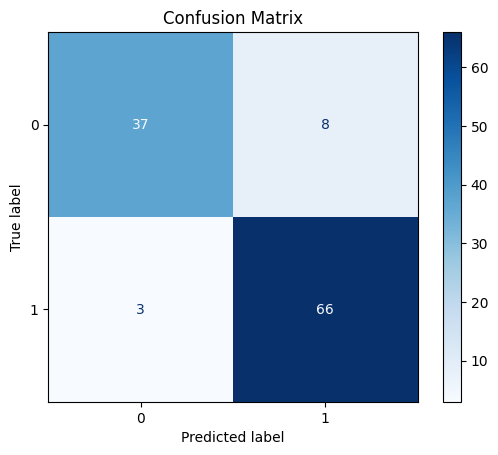

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predicted_cls)

# Display the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()